In [3]:
# Importing the necessary libraries
import numpy as np
import librosa
import matplotlib.pyplot as plt
import librosa.display

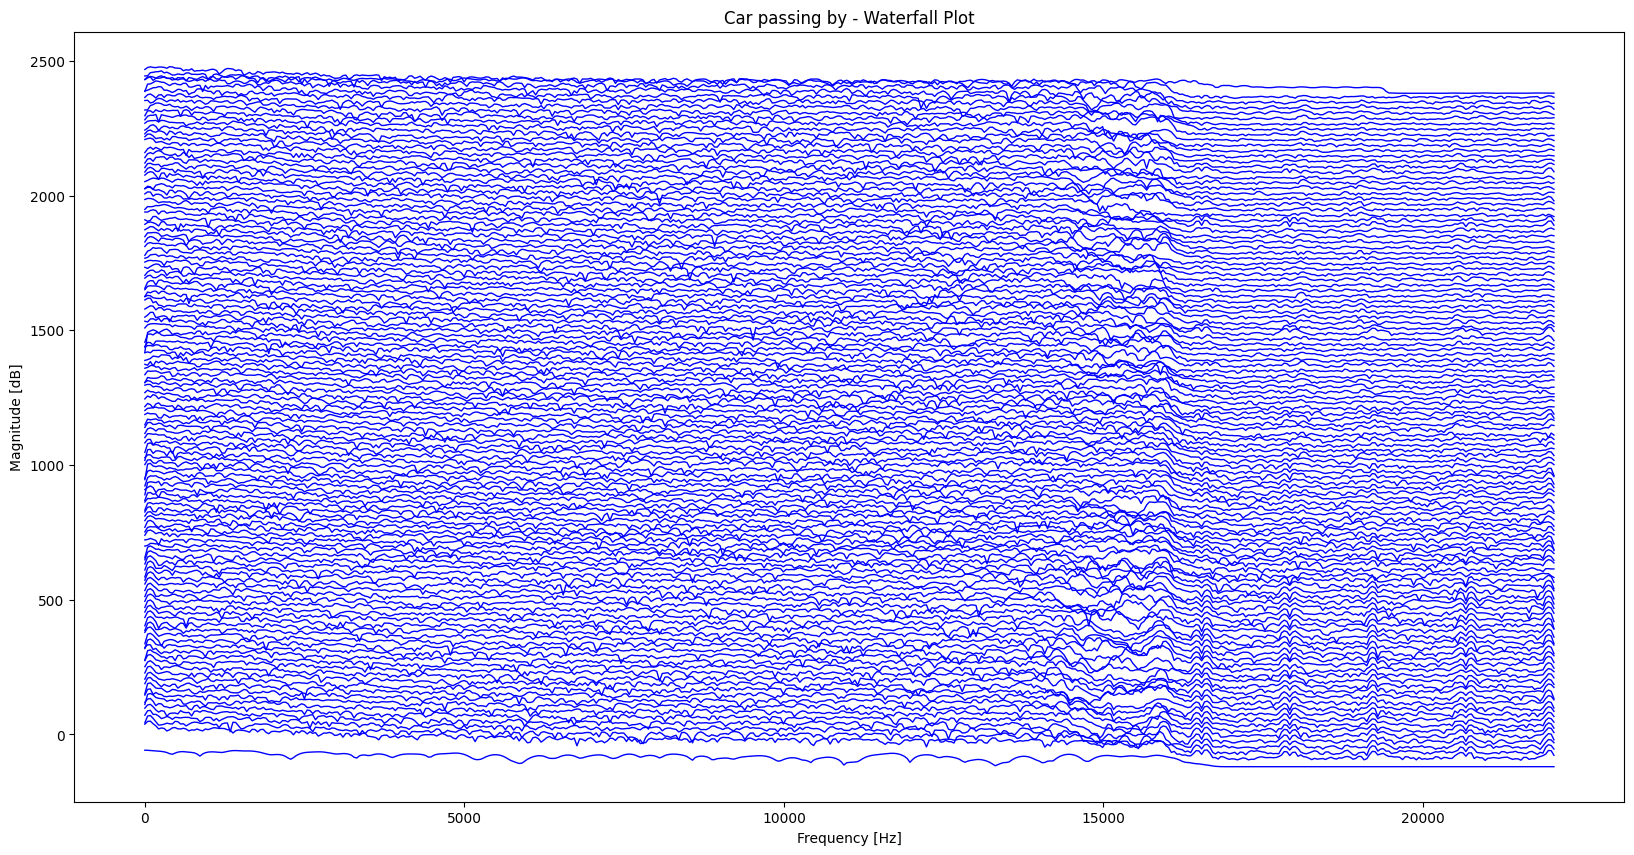

In [4]:

# Loading the audio file at the native sample rate
audio_path = 'car_passing.mp3'
y, sr = librosa.load(audio_path, sr=None)

# Computing the STFT, which is the Short-Time Fourier Transform of the audio signal.
# The STFT represents how the frequency content of the signal changes over time. It first breaks the signal into shorter segments and applies fourier transform on each segment.


n_fft = 1024  # Number of FFT components. FFT components are the number of frequency bins that we want to compute.

sample_freq = 1024*2  # Number of samples between successive frames

STFT = librosa.stft(y, n_fft=n_fft, hop_length=sample_freq) # STFT of the audio signal

# Calculating the magnitude of the STFT, i.e. the loudness of the signal at each frequency and time point in decibels.
magnitude_db = 20 * np.log10(np.abs(STFT) + 1e-6)

fig, ax = plt.subplots(figsize=(20, 10))

# Offset factor between lines
offset = 20

# Ploting each frame of the STFT and offseting it by the factor
for i in range(magnitude_db.shape[1]):
    ax.plot(np.linspace(0, sr/2, n_fft//2+1), magnitude_db[:, i] + i * offset, color='b', linewidth=1.0)


ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Magnitude [dB]')
ax.set_title('Car passing by - Waterfall Plot')
plt.show()


As we can see from the plot, most of the peaks can be observed near the 15000Hz frequency mark, indicating the frequency of the car sound. It can also be infered from the graph that the peaks are larger in the middle, i.e. in the middle time interval of the mp3 file. While the peaks are smaller as we go farther from the middle i.e. at the start and end of the audio file. This parallels the fact that the car is far at first to the recorder first, comes closer and then goes far. 